In [4]:
from TextPreprocessing import clean
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import umap
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [ ]:
dataset = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
classes = list(dataset.target_names)

def LSA(k, X):
    vectorizer = TfidfVectorizer(smooth_idf=True, max_features=1000)
    X_transformed = vectorizer.fit_transform(X)
    svd = TruncatedSVD(n_components=k, algorithm='randomized', n_iter=300, random_state=122)
    lsa = svd.fit_transform(X_transformed) 
    document_topic_matrix = pd.DataFrame(lsa,columns=classes, index = X)
    dic = vectorizer.get_feature_names()
    term_topic_matrix = pd.DataFrame(svd.components_, index = classes, columns = (dic)).T
    return lsa, document_topic_matrix, term_topic_matrix

def NMFFunction(k, X):
    vectorizer = TfidfVectorizer(smooth_idf=True, max_features=1000)
    X_transformed = vectorizer.fit_transform(X)
    model = NMF(n_components=k, random_state=122, init='nndsvd')
    topicmodel = model.fit_transform(X_transformed) 
    document_topic_matrix = pd.DataFrame(topicmodel,columns=classes, index = X)
    dic = vectorizer.get_feature_names()
    term_topic_matrix = pd.DataFrame(model.components_, index = classes, columns = (dic)).T
    return topicmodel, document_topic_matrix, term_topic_matrix


df = pd.DataFrame()
df["Topic"] = dataset.target
df["Topic"] = df["Topic"].apply(lambda x: classes[x])
df["Document"] = dataset.data
df["Cleaned Document"] = df["Document"].apply(lambda x: clean(x))

lsa, document_topic_matrix_lsa, term_topic_matrix_lsa = LSA(20, df["Cleaned Document"]) 
nmf, document_topic_matrix_nmf, term_topic_matrix_nmf = NMFFunction(20, df["Cleaned Document"]) 

In [7]:
document_topic_matrix_lsa

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
Cleaned Document,,,,,,,,,,,,,,,,,,,,
wonder anyon could enlighten car saw day door sport car look late earli call bricklin door realli small addit front bumper separ rest bodi know anyon tellm model name engin spec year product car made histori whatev info funki look car pleas email,0.195646,0.050924,0.092061,0.112394,-0.136283,0.033288,0.046987,-0.244361,-0.150899,-0.179157,-0.043017,-0.143539,0.229530,-0.217880,-0.146716,-0.066024,-0.089855,0.148253,-0.089034,-0.055572
fair number brave soul upgrad si clock oscil share experi poll pleas send brief messag detail experi procedur top speed attain cpu rate speed add card adapt heat sink hour usag per day floppi disk function floppi especi request summar next two day pleas add network knowledg base done clock upgrad answer poll thank,0.143378,0.121813,0.021639,0.052039,-0.095678,-0.041719,-0.092696,0.002094,0.007518,0.055304,0.001620,-0.013626,-0.015589,0.024485,-0.014146,-0.027562,-0.045126,0.041532,0.010220,-0.033895
well folk mac plus final gave ghost weekend start life k way back sooo market new machin bit sooner intend look pick powerbook mayb bunch question hope somebodi answer anybodi know dirt next round powerbook introduct expect would heard c suppos make appear summer heard anymor sinc access macleak wonder anybodi info anybodi heard rumor price drop powerbook line like one duo went recent impress display could probabl swing got mb disk rather realli feel much better display yea look great store wow realli good could solicit opinion peopl use daytoday worth take disk size money hit get activ display realiz real subject question play around machin comput store breifli figur opinion somebodi actual use machin daili might prove help well hellcat perform thank bunch advanc info could email post summari news read time premium final around corner tom willi twillisecnpurdueedu purdu electr engin,0.355203,0.098543,0.065173,0.063276,-0.046015,0.006039,0.032112,-0.002614,-0.029722,-0.018345,-0.044448,0.058398,-0.044121,-0.004295,0.021720,-0.011469,-0.000715,-0.017952,-0.004707,-0.030282
weitek addressphon number would like get inform chip,0.217907,0.045949,0.044481,0.011621,-0.095607,0.231086,0.148007,0.182342,0.016563,-0.012565,-0.044244,-0.156501,-0.031205,0.122356,0.026165,0.121667,-0.017271,-0.035258,-0.185248,-0.002197
articl c owcbn pworldstdcom tombakerworldstdcom tom baker understand expect error basic known bug warn system softwar thing check right valu yet set till launch suchlik rather fix code possibl introduc new bug tell crew ok see warn liftoff ignor,0.156041,0.024913,-0.043921,-0.050171,0.019662,-0.002531,-0.020127,-0.017269,0.015131,0.002261,-0.000779,0.001209,-0.041239,0.038260,-0.051701,-0.026494,0.016349,0.000368,0.032776,-0.016354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dn nyedacnsvaxuwecedu david nye dn neurolog dn consult cheaper scan also better neurologist make differenti diagnosi migrain tensiontyp headach cluster benign intracrani hypertens chronic paroxysm hemicrania headach syndrom appear normal scan neurologist also recommend cours treatment appropri diagnosi dn also sinc mani peopl convinc brain tumor dn serious patholog may cheaper get ct scan dn come er everi week dn easier take time reassur patient right dn person think ever justifi sigh may never justifi sometim even tri show thorough detail histori neurolog examin discuss patient diagnosi salt lot reassur patient still ask order scan absolut sure aunt milli often get convers ignor aunt milli headach year die brain tumor aneurysm whatev get away without ever order imag patient obvious benign headach syndrom would like hear m

In [8]:
term_topic_matrix_lsa

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
abl,0.033347,0.015170,-0.001802,-0.012875,-0.004974,-0.000549,0.010795,0.017463,0.002156,0.011552,-0.006200,-0.008302,-0.000376,-0.004700,-0.005914,0.016940,0.012655,-0.002678,0.000732,0.012461
absolut,0.014757,-0.018744,-0.017347,0.001911,0.003631,-0.014306,-0.005385,0.004976,-0.003856,-0.002134,-0.000161,-0.000250,-0.002362,-0.001785,0.005540,-0.014036,0.010048,0.005922,0.011322,0.002922
accept,0.026060,-0.020676,-0.031024,0.009229,0.000305,-0.015905,-0.009782,0.002618,0.006730,0.006967,0.016333,-0.002993,-0.004781,0.009678,0.006465,-0.005123,0.005207,0.005497,0.001327,0.012338
access,0.022624,0.039433,-0.013062,-0.026315,-0.006391,0.012009,-0.019220,0.013872,0.033007,-0.004748,-0.018789,-0.005095,0.009393,0.005755,-0.014049,-0.000468,0.005465,0.016593,-0.004006,0.003232
accord,0.013649,-0.010161,-0.006835,-0.002637,-0.001286,-0.007415,-0.010269,-0.004619,0.002257,-0.002477,0.006655,-0.002753,0.002735,-0.004757,-0.007880,-0.002079,-0.011652,-0.005398,-0.004789,0.010393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year,0.090088,-0.081487,0.203907,-0.035144,0.049908,-0.009342,-0.105358,-0.085865,-0.002558,-0.011869,0.031216,0.028995,-0.034674,-0.063786,-0.203245,0.050948,0.032265,0.049495,-0.069643,0.081641
yes,0.033485,-0.015367,-0.004196,-0.007155,-0.001272,-0.002066,-0.012339,-0.002830,-0.009289,0.008168,-0.006039,0.013710,0.008416,-0.001941,0.009791,-0.009735,-0.001653,0.027151,0.002514,0.004014
yet,0.028810,-0.013410,-0.007682,-0.008110,0.007929,-0.002696,-0.004588,0.010019,-0.006729,-0.000541,-0.003777,-0.001026,0.010938,0.004449,-0.012811,0.002848,0.009569,0.005844,-0.008116,0.003389
york,0.009578,-0.007267,0.019076,0.001633,0.003963,0.002245,-0.021142,-0.017132,0.005397,0.006031,0.011569,-0.010326,0.008178,-0.005127,-0.009147,0.002824,0.016994,-0.017291,-0.014288,-0.000164


In [9]:
document_topic_matrix_nmf

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
Cleaned Document,,,,,,,,,,,,,,,,,,,,
wonder anyon could enlighten car saw day door sport car look late earli call bricklin door realli small addit front bumper separ rest bodi know anyon tellm model name engin spec year product car made histori whatev info funki look car pleas email,0.000000,0.000000,0.000000,0.036636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063464,0.000325,0.174040,0.000000,0.014617,0.000000,0.000000,0.000000,0.004312,0.000000
fair number brave soul upgrad si clock oscil share experi poll pleas send brief messag detail experi procedur top speed attain cpu rate speed add card adapt heat sink hour usag per day floppi disk function floppi especi request summar next two day pleas add network knowledg base done clock upgrad answer poll thank,0.004067,0.001822,0.005532,0.057425,0.000000,0.000503,0.006158,0.000000,0.028113,0.040914,0.000000,0.004217,0.008561,0.000000,0.000000,0.002033,0.002979,0.001088,0.000473,0.004429
well folk mac plus final gave ghost weekend start life k way back sooo market new machin bit sooner intend look pick powerbook mayb bunch question hope somebodi answer anybodi know dirt next round powerbook introduct expect would heard c suppos make appear summer heard anymor sinc access macleak wonder anybodi info anybodi heard rumor price drop powerbook line like one duo went recent impress display could probabl swing got mb disk rather realli feel much better display yea look great store wow realli good could solicit opinion peopl use daytoday worth take disk size money hit get activ display realiz real subject question play around machin comput store breifli figur opinion somebodi actual use machin daili might prove help well hellcat perform thank bunch advanc info could email post summari news read time premium final around corner tom willi twillisecnpurdueedu purdu electr engin,0.018512,0.022725,0.016313,0.047374,0.004095,0.000000,0.014658,0.017369,0.017548,0.012186,0.022844,0.001245,0.006170,0.002655,0.042219,0.029868,0.014331,0.007017,0.000000,0.018918
weitek addressphon number would like get inform chip,0.000000,0.000000,0.000000,0.004037,0.000000,0.000000,0.000000,0.060469,0.000000,0.000000,0.000000,0.060290,0.000000,0.000000,0.067827,0.101650,0.000000,0.000000,0.000000,0.000000
articl c owcbn pworldstdcom tombakerworldstdcom tom baker understand expect error basic known bug warn system softwar thing check right valu yet set till launch suchlik rather fix code possibl introduc new bug tell crew ok see warn liftoff ignor,0.019953,0.003935,0.000000,0.000120,0.005661,0.001863,0.017516,0.000201,0.002912,0.000000,0.000121,0.003599,0.000000,0.005998,0.002245,0.000000,0.034143,0.002033,0.000000,0.006216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dn nyedacnsvaxuwecedu david nye dn neurolog dn consult cheaper scan also better neurologist make differenti diagnosi migrain tensiontyp headach cluster benign intracrani hypertens chronic paroxysm hemicrania headach syndrom appear normal scan neurologist also recommend cours treatment appropri diagnosi dn also sinc mani peopl convinc brain tumor dn serious patholog may cheaper get ct scan dn come er everi week dn easier take time reassur patient right dn person think ever justifi sigh may never justifi sometim even tri show thorough detail histori neurolog examin discuss patient diagnosi salt lot reassur patient still ask order scan absolut sure aunt milli often get convers ignor aunt milli headach year die brain tumor aneurysm whatev get away without ever order imag patient obvious benign headach syndrom would like hear magic everi abl bypass imag get eeg mind think eeg te

In [10]:
term_topic_matrix_nmf

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
abl,0.102424,0.076234,0.015788,0.000000,0.047575,0.014967,0.000900,0.086207,0.064399,0.077528,0.043168,0.067561,0.003314,0.028982,0.012005,0.052020,0.000000,0.000000,0.010775,0.011612
absolut,0.116831,0.000000,0.002279,0.000000,0.000000,0.108365,0.013648,0.000000,0.000000,0.000000,0.004420,0.000000,0.000000,0.001550,0.000000,0.000000,0.000000,0.019823,0.000833,0.007079
accept,0.157992,0.000000,0.000000,0.009425,0.022320,0.146826,0.039655,0.026684,0.002190,0.008736,0.000000,0.000000,0.000000,0.005219,0.000000,0.000000,0.000000,0.027384,0.037684,0.024850
access,0.028063,0.111567,0.000000,0.044635,0.059923,0.000000,0.000000,0.000000,0.147717,0.010301,0.000000,0.169930,0.000000,0.083379,0.000000,0.013297,0.014567,0.000000,0.000000,0.000000
accord,0.046227,0.000000,0.012978,0.000000,0.000000,0.064231,0.018006,0.004105,0.009167,0.000000,0.000000,0.000000,0.034698,0.006878,0.000000,0.000000,0.009749,0.003270,0.040990,0.039807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year,0.496467,0.000000,0.836830,0.000000,0.000000,0.000000,0.223001,0.000000,0.000000,0.000000,0.000000,0.000000,0.177143,0.000000,0.000000,0.034808,0.000000,0.013612,0.091654,0.000000
yes,0.222802,0.081337,0.043808,0.025006,0.000000,0.050412,0.000000,0.000000,0.014288,0.024009,0.000000,0.031855,0.038584,0.000000,0.000177,0.017979,0.003888,0.032017,0.016197,0.028470
yet,0.151254,0.045435,0.039125,0.000000,0.036972,0.097545,0.000000,0.013202,0.007929,0.000000,0.015829,0.067879,0.011520,0.000000,0.022451,0.019574,0.020014,0.014983,0.011861,0.004698
york,0.028521,0.000000,0.070773,0.000000,0.000000,0.000000,0.107206,0.000000,0.000000,0.000000,0.000662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046965,0.000000


C:\Anaconda37\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\..\..\..\..\Anaconda37\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


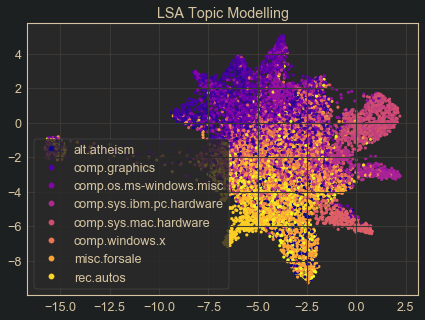

In [5]:
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(lsa)
plt.figure(figsize=(7,5))
plt.title("LSA Topic Modelling")
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c = dataset.target,s = 10, edgecolor='none',cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels = classes)
plt.savefig("Topic Modelling LSA.svg",dpi=2000)
plt.show()

C:\Anaconda37\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\..\..\..\..\Anaconda37\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


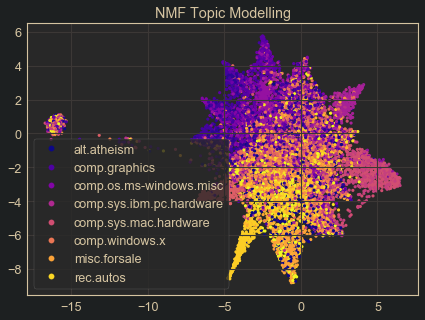

In [6]:
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(nmf)
plt.figure(figsize=(7,5))
plt.title("NMF Topic Modelling")
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c = dataset.target,s = 10, edgecolor='none',cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels = classes)
plt.savefig("Topic Modelling NMF.svg",dpi=2000)
plt.show()